# Vaja 1 - Od kamere do preproste detekcije predmetov

Da uspešno opravite vajo, jo morate predstaviti asistentu na vajah. Pri nekaterih nalogah so vprašanja, ki zahtevajo skiciranje, ročno računanje in razmislek. Končno rešitev na takšna vprašanja vpišite v predvideni prostor, postopek reševanja pa razložite asistentu na vajah. Deli nalog, ki imajo pred navodilom navedene točke, niso obvezni. Brez njih lahko za celotno vajo dobite največ **75** točk (zgornja meja je **100** točk kar pomeni oceno 10). V nekaterih vajah je dodatnih nalog več in vam ni potrebno opraviti vseh.


## Naloga 1: Kamera

Namen te naloge je spoznati model kamere z luknjico (<i>pin-hole camera</i>) ter osnove digitalnega zajema slike. Kot ste to izvedeli na predavanjih, model kamere z luknjico opisuje par preprostih geometrijskih razmerij:

$x = -f \frac{X}{Z} $ in $ y = -f \frac{Y}{Z}$,<br>


ki vsako točko v prostoru s koordinatami $(X, Y, Z)$ preko goriščne razdalje $f$ poveže z njeno projekcijo na sliki $(x, y)$. Grafično je povezava prikazana še na spodnji sliki.

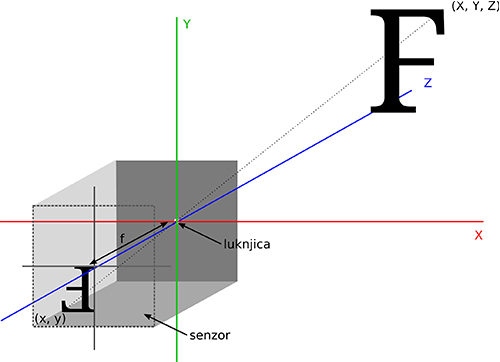

Rešite naslednje naloge:

* Kockasta škatla z velikostjo stranice $10cm$ z majhno odprtino na prednji strani deluje kot kamera z luknjico. Usmerimo jo proti drevesu, ki je od kamere oddaljeno $14m$. Kako velika je slika drevesa, ki nastane na zadnji strani škatle, če je drevo visoko $5m$? Rešitev poslikaj in dodajte sliko v Jupyter notebook <i>(Edit -> Inster Image)</i>.

In [3]:
# Zapišite rešitev tukaj

#camera obscura calculation

z = 14.0 #distance from the object to the camera
h = 5.0 #height of the object
x = 0.10 #depth of the camera
y = 0.10 #width of the camera

#calcuate the size of the object on the back face of the camera
h1 = h * x / z
w1 = y * x / z

print("Višina drevesa na zadnji strani škatle je: ", h1*100, "cm")

Višina drevesa na zadnji strani škatle je:  3.571428571428571 cm


* Z enako kamero, kot v prejšnji nalogi opazujemo avtomobil, širok $2.5m$, ki je na začetku od kamere oddaljen $10m$, nato pa se z enakomernim pospeškom $0.5\frac{m}{s^2}$ oddaljuje od kamere. S pomočjo Python skripte in knjižnice MatPlotLib narišite graf, kako se širina slike avtomobila spreminja s časom. Izračunajte vrednosti za prvih $30s$ v intervalu $10$ meritev na sekundo. Za izris grafa uporabite funkcijo <i>matplotlib.pyplot</i>.

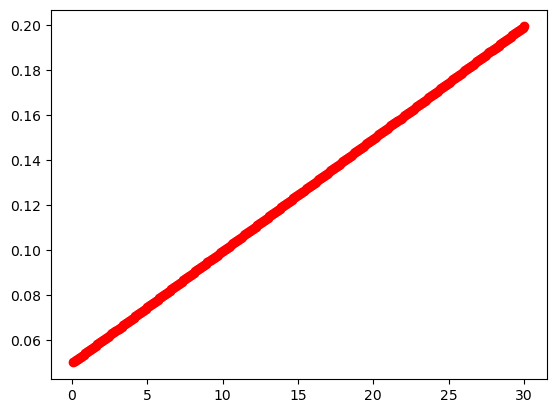

In [4]:
import matplotlib.pyplot as plt
#camera obscura calculation

z = 10.0 #distance from the object to the camera
x = 0.10 #depth of the camera
y = 0.10 #width of the camera
w = 5.0 #width of the object
a = 0.5 #acceleration of the object away from the camera (m/s^2)
t = 30 #time (s)
interval = 0.1 #time interval (s)

#plot the width of the object on the back face of the camera
t = 0
while t < 30:
    w1 = w * x / z
    w = w + a * interval
    t = t + interval
    plt.plot(t, w1, 'ro')
plt.show()



* Zakaj se kamere z luknjico uporabljajo bolj kot teoretičen model in ne tudi v praksi? Naštejte prednosti in slabosti kamer z lečami.

prednost kamere z lečo so:
- Večji kot zajemanja
- manjša velikost kamere
- spremenljiva razdalja fokusa
- Spremenljiv čas odprtja leče

slabosti:
- slika je distorirana

Sliko, ki je projecirana na zadnjo stran kamere, zajamemo v digitalno obliko z (največkrat) matričnim senzorjem. Več o tem ste povedali že na predavanih, tu pa ponovimo samo, da sta najpomembnejša parametra senzorja njegova velikost in gostota. Ker se gostota senzorja največkrat podaja v točkah na inčo (<i>dots per inch -- DPI</i>), si je na tem mestu pametno zapomniti, da je $1 \mathrm{inch} = 2.54 cm$.

* S kamero z goriščno razdaljo $f = 60mm$ posnamemo sliko vertikalnega valja, ki je od kamere oddaljen $95m$. Določi višino valja, če v digitalizirani obliki slika valja po višini zavzame $200$ slikovnih elementov. Ločljivost tipala je $2500$ DPI.

In [5]:
f = 0.60 #focal length of the camera (m)
dpi = 2500 #camera sensor resolution (dots per inch)
z = 95.0 #distance from the object to the camera
h1 = 200 #height of the object in pixels on the camera sensor

#calculate the height of the object in meters
h = h1 * z / (dpi * f)

print("Višina valja je: ", h, "m")

Višina valja je:  12.666666666666666 m


* <b>$\star$ (10 točk)</b> Za naslednjo nalogo boste potrebovali spletno kamero ter OpenCV knjižnico. Spletna kamera sicer ni čista kamera z luknjico, vsebuje lečo, zato pri zajemu slike prihaja do določene stopnje popačenja. Kljub temu z uporabo kamere preizkusite zakonitosti, ki jih opisuje enačba kamere z luknjico v praksi. Kamero postavite na statično mesto s pogledom na mizo. Pred kamero na izmerjeno razdaljo od nje postavite objekt. S programom za zajem slik iz kamere pridobite več (vsaj šest) zaporednih slik objekta pri čemer objekt premikajte na različne razdalje in zabeležite oddaljenost od kamere. Nato posamezne slike naložite v Jupyter notebook in zabeležite višino objekta v številu slikovnih elementov (pomagajte si z orodjem <i>PyPlot</i>, lahko pa to naredite tudi v programu za urejanje slik). Na podlagi višine v slikovnih elementih in oddaljenosti od kamere lahko določite kakšna bo velikost v slikovnih elementih pri drugi razdalji od kamere. Preverite oceno še z dejansko meritvijo in ocenite napake.

In [6]:
# Zapišite rešitev tukaj

## Naloga 2: Procesiranje slik

Namen te naloge je spoznavanje z osnovno funkcionalnostjo OpenCV in z zapisom slik v matrikah.

* Preberite sliko iz datoteke <i>umbrellas.jpg</i> z uporabo knjižnice OpenCV in jo prikažite z uporabo knjižnice MatPlotLib.

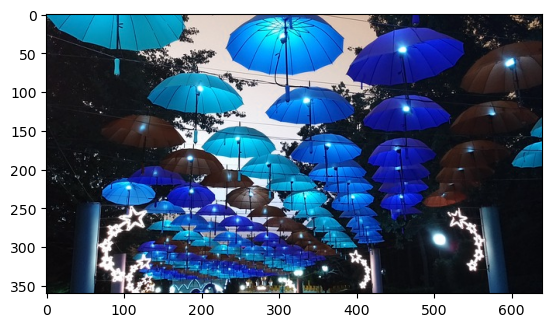

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# use opencv to read the image
img = cv2.imread('umbrellas.jpg')

# display the image using matplotlib
plt.imshow(img)
plt.show()


* Slika, ki ste jo naložili ima tri kanale, RGB, in je spravljena v 3D matriko velikosti $visina \times sirina \times kanali = h \times w \times 3$. Izpišite si na zaslon velikost slike z uporabo ukaza <i>.shape</i> ter tip matrika z uporabo ukaza <i>.dtype</i>. Spremenite barvno sliko v sivinsko tako, da povprečite kanale in sliko zopet prikažite. Bodite pozorni na tip matrike, slika se namreč prebere v matriko tipa <i>uint8</i>, kjer element lahko zavzame samo vrednosti od $0$ do $255$. Računanje s takimi tipi je lahko problematično (npr. pri seštevanju pride do preliva, rezultat pa je napačen), zato matriko pred računanjem spremenite v drug tip, npr <i>double</i>.

Image shape:  (360, 640, 3)
Image data type:  uint8


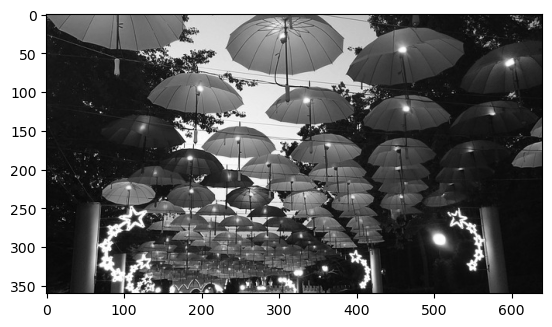

In [8]:
print("Image shape: ", img.shape)

print("Image data type: ", img.dtype)

# average the channels to get a grayscale image
img_double = img.astype(np.float64)
img_gray = np.average(img_double, axis=2)

# display the grayscale image
plt.imshow(img_gray, cmap='gray')

* V zgornjem primeru se je slika izrisala s privzeto barvno tabelo. Barvna tabela pomeni način, kako vam MatPlotLib prikaže odtenek sivine. Na primer, temne odtenke lahko prikaže modro, svetle pa z rdečo. Poskusite spremeniti barvno tabelo v sliki s spreminjanjem parametra <i>cmap</i> funkcije <i>imshow</i>. Poskusite z vrednostmi <i>jet</i>, <i>bone</i>, <i>gray</i>.

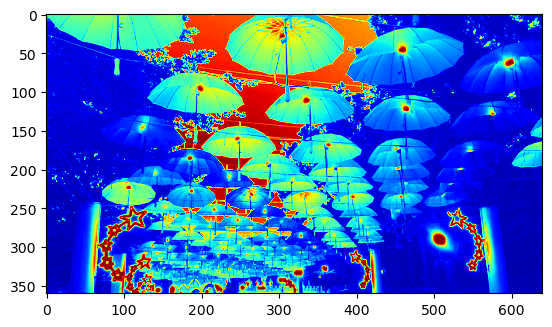

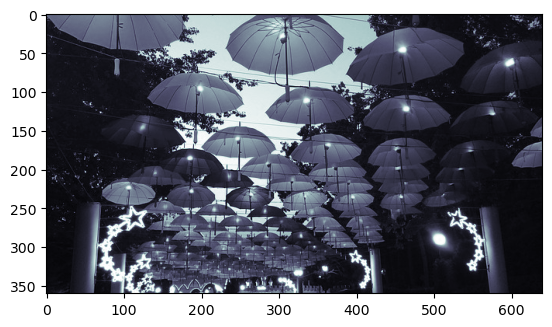

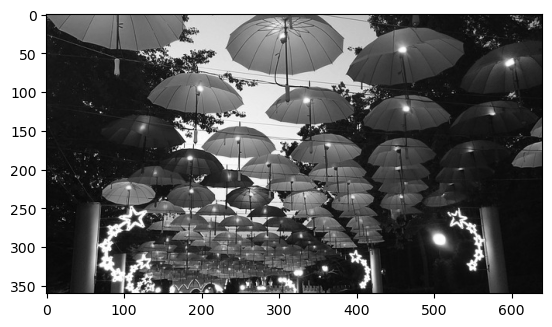

In [9]:
# change the image using jet, bone, gray
plt.imshow(img_gray, cmap='jet')
plt.show()

# change the image using jet, bone, gray
plt.imshow(img_gray, cmap='bone')
plt.show()
# change the image using jet, bone, gray
plt.imshow(img_gray, cmap='gray')
plt.show()  

* Izrežite pravokotno regijo s slike in jo izrišite kot novo sliko. Regijo v prvi sliki bomo označili tako, da modri kanal postavimo na nič.

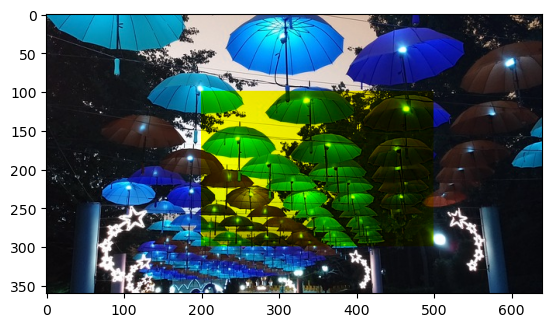

In [10]:
#crop a ractangle from the image and set it's blue channel to 0
img_crop = img.copy()
img_crop[100:300, 200:500, 2] = 0

# display the cropped image
plt.imshow(img_crop)
plt.show()

* Izrišite sivinsko sliko, kjer del sivinske verzije slike negirate.

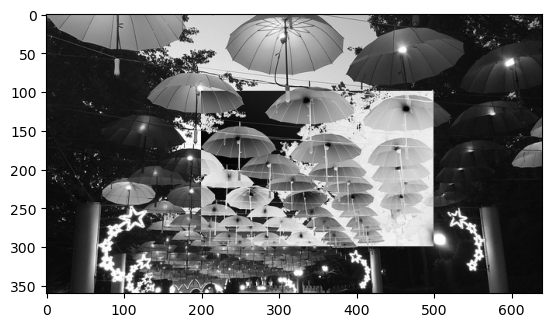

In [11]:
img_crop = img.copy()
#grayscale the image
img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)

#invert rectangle
img_crop[100:300, 200:500] = 255 - img_crop[100:300, 200:500]

# display the cropped image
plt.imshow(img_crop, cmap='gray')
plt.show()


* Izrišite upragovano binarno sliko, v kateri vrednost $1$ označuje elemente, ki imajo v izhodiščni sliki sivinski nivo večji od $150$ in spremenite barvno lestvico v črnobelo.

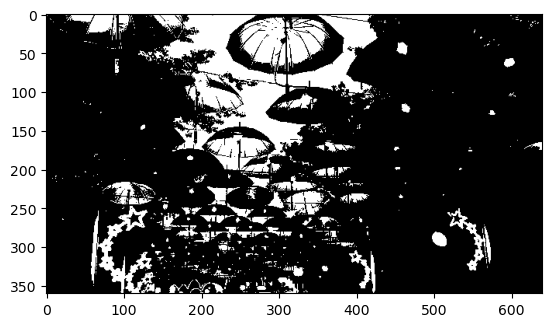

In [12]:
img_gray = img.copy()
#grayscale the image
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)

binary_bitmap = np.zeros(img_gray.shape)

#if the pixel is bigger than 150 set it 1
binary_bitmap[img_gray > 150] = 1

# display the biary bitmap
plt.imshow(binary_bitmap, cmap='gray')

## Naloga 3: Histogrami

V nadaljevanju si bomo ogledali, kako gradimo in prikazujemo histograme. Histogrami so zelo uporaben način opisa slike, s katerim lahko veliko povemo o porazdelitvi slikovnih elementov v sliki, s tem pa do neke mere tudi kaj o vsebini slike. Zaradi njihove preprostosti in uporabnosti so zelo razširjeni, zato posvetite pozornost procesu grajenja, ki ga bomo opisali v tej nalogi.

Podana je $3$-bitna sivinska slika:
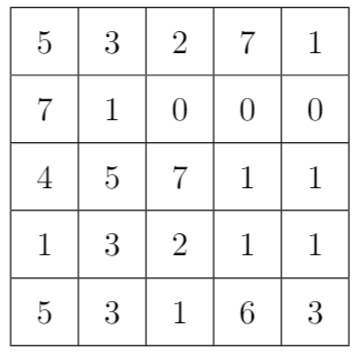

In [48]:
# 3 bit binary bitmap 5x5
bitmap = np.array([[5, 3, 2, 7, 1],
                     [7, 1, 0, 0, 0],
                     [4, 5, 7, 1, 1],
                     [1, 3, 2, 1, 1],
                     [5, 3, 1, 6, 3]])

* Določite histogram za podano sliko (v obliki tabele in z grafično predstavitvijo). Rešitev poslikaj in dodajte sliko v Jupyter notebook <i>(Edit -> Inster Image)</i>.

(array([3., 8., 2., 4., 1., 3., 1., 3.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

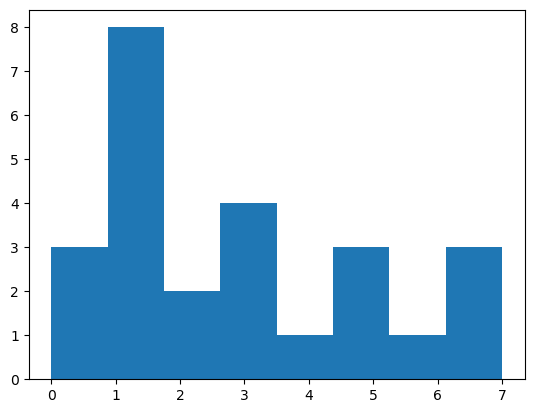

In [49]:
#histogram of the bitmap
plt.hist(bitmap.ravel(), bins=8)



 * Na podlagi izračunanega histograma določite kumulativni histogram slike. Rešitev poslikaj in dodajte sliko v Jupyter notebook <i>(Edit -> Inster Image)</i>.

(array([ 3., 11., 13., 17., 18., 21., 22., 25.]),
 array([0.   , 0.875, 1.75 , 2.625, 3.5  , 4.375, 5.25 , 6.125, 7.   ]),
 <BarContainer object of 8 artists>)

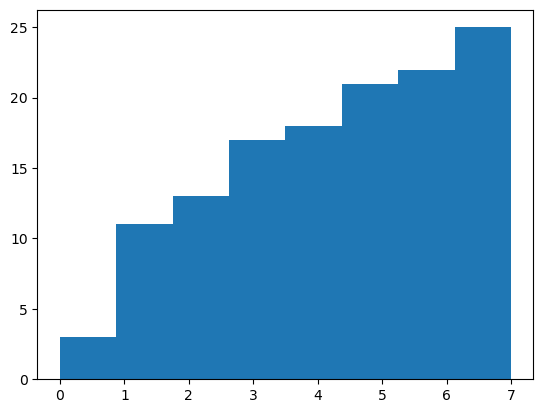

In [50]:
#comulitative histogram of the bitmap
plt.hist(bitmap.ravel(), bins=8, cumulative=True)


* Kakšen bi bil histogram, če bi bila slika $4$-bitna?

(array([3., 0., 8., 0., 2., 0., 4., 0., 0., 1., 0., 3., 0., 1., 0., 3.]),
 array([0.    , 0.4375, 0.875 , 1.3125, 1.75  , 2.1875, 2.625 , 3.0625,
        3.5   , 3.9375, 4.375 , 4.8125, 5.25  , 5.6875, 6.125 , 6.5625,
        7.    ]),
 <BarContainer object of 16 artists>)

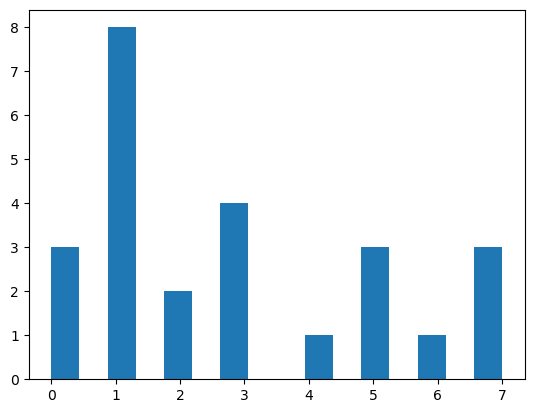

In [56]:

#histogram of the bitmap
plt.hist(bitmap.ravel(), bins=16)

* Računanje histograma je implementirano v MatPlotLib v okviru funkcije <i>hist</i>. Naložite sliko <i>umbrellas.jpg</i> in jo spremenite v sivinsko. Ker funkcija <i>hist()</i> ne deluje na slikah ampak na zaporedju vrednosti, moramo sliko najprej preoblikovati iz matrike velikosti $(N \times M)$ v $1$-D vektor velikosti $N M \times 1$, ta vektor pa se nato uporabi za izračun histograma. Prav tako je pomembno, da so vhodne vrednosti tipa <i>double</i>. Izrišite histograme za različno število celic.

(array([  18.,   84.,   75.,   81.,  105.,  115.,  150.,  237.,  344.,
         917., 2370., 3285., 4552., 5229., 4846., 4810., 4819., 4950.,
        4891., 5324., 5953., 5370., 4596., 3968., 3481., 3096., 2876.,
        2643., 2386., 2155., 2001., 1949., 2013., 1861., 1753., 1657.,
        1424., 1342., 1277., 1227., 1224., 1172., 1055., 1081., 1094.,
        1083.,  962., 1018.,  959., 1116., 1067., 1085., 1170., 1167.,
        1251., 1124., 1213., 1217., 1164., 1128., 1090., 1130., 1047.,
        1041., 1098., 1110., 1070.,  960.,  941.,  933.,  848.,  883.,
         855.,  829.,  774.,  790.,  744.,  791.,  791.,  757.,  800.,
         746.,  754.,  802.,  738.,  702.,  695.,  698.,  726.,  671.,
         657.,  615.,  625.,  614.,  630.,  667.,  662.,  615.,  601.,
         625.,  609.,  613.,  587.,  620.,  626.,  628.,  599.,  619.,
         585.,  648.,  617.,  652.,  625.,  574.,  633.,  677.,  597.,
         665.,  605.,  646.,  620.,  615.,  633.,  606.,  591.,  606.,
      

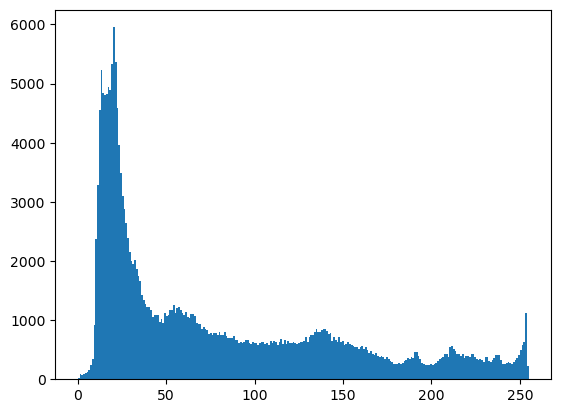

In [57]:
img = cv2.imread('umbrellas.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#change the image to a 1D array
img_gray = img_gray.ravel()

#histogram of the image
plt.hist(img_gray, bins=256)

* V okviru naslednje točke boste implementirali operacijo <i>razteg histograma</i>. Z uporabo pripravljenega skeleta implementirajte funkcijo <i>histogram_stretch()</i>, ki vhodno sliko popravi tako, da njene vrednosti raztegne preko celotnega spektra sivinskih nivojev. Za okvirni potek algoritma se zgledujte po prosojnicah s predavanj. Ker funkcija opravlja enako operacijo na vseh slikovnih elementih slike, implementirajte celotno funkcijo brez zank z uporabo matričnih operacij.

Namigi: Za vhodno sliko lahko določite najvišjo $v_{max}$ in najnižjo $v_{min}$ sivinsko vrednost z <i>np.max(I)</i> in <i>np.min(I)</i>.

Pomembno: pri nalogi je prepovedana uporaba integriranih funkcij, izračun novih vrednosti morate implementirati sami.

Za preizkus funkcije preberite z diska datoteko <i>phone.jpg</i> (ki je že sivinska slika) in zanjo izrišite histogram z $256$ celicami. S histograma lahko opazite, da najnižja sivinska vrednost v sliki ni $0$, in najvišja ni $255$. Nato na sliki opravite razteg histograma ter prikažite rezultat v obliki slike in njenega histograma (histogrami naj vsebujejo $256$ celic).

(array([3.0000e+00, 8.0000e+00, 0.0000e+00, 3.9000e+01, 3.3000e+01,
        0.0000e+00, 1.0800e+02, 0.0000e+00, 1.4100e+02, 2.1100e+02,
        0.0000e+00, 1.6000e+02, 0.0000e+00, 2.6100e+02, 3.0000e+02,
        0.0000e+00, 5.1200e+02, 0.0000e+00, 6.3000e+02, 8.0100e+02,
        0.0000e+00, 9.0000e+02, 0.0000e+00, 1.1390e+03, 8.9500e+02,
        0.0000e+00, 1.3480e+03, 0.0000e+00, 1.1630e+03, 1.1790e+03,
        0.0000e+00, 1.2740e+03, 0.0000e+00, 1.2970e+03, 1.2290e+03,
        0.0000e+00, 1.1570e+03, 1.3240e+03, 0.0000e+00, 1.3290e+03,
        0.0000e+00, 1.4130e+03, 1.7050e+03, 0.0000e+00, 1.8560e+03,
        0.0000e+00, 2.5940e+03, 2.0560e+03, 0.0000e+00, 1.5430e+03,
        0.0000e+00, 1.2940e+03, 1.2080e+03, 0.0000e+00, 1.5560e+03,
        0.0000e+00, 1.1590e+03, 8.0000e+02, 0.0000e+00, 7.8900e+02,
        0.0000e+00, 5.7000e+02, 5.1200e+02, 0.0000e+00, 4.8100e+02,
        0.0000e+00, 4.1700e+02, 4.7100e+02, 0.0000e+00, 3.9800e+02,
        0.0000e+00, 3.6100e+02, 3.5600e+02, 0.00

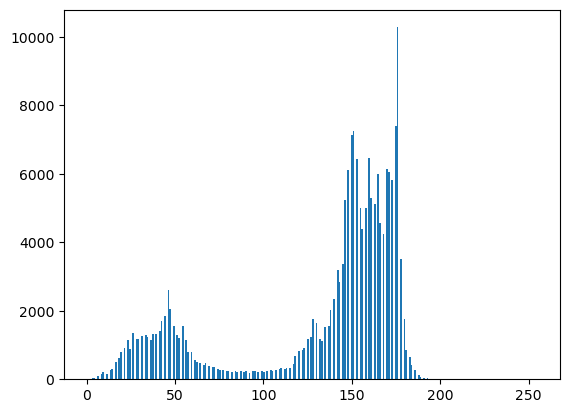

In [61]:
# stretch the histogram
def histogram_stretch(I):
    # find the minimum and maximum pixel values
    min_val = np.min(I)
    max_val = np.max(I)
    
    # stretch the histogram
    I_stretched = (I - min_val) / (max_val - min_val) * 255
    
    return I_stretched

#histogram of the image
img_gray = cv2.imread('phone.jpg')
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
img_gray = img_gray.ravel()
plt.hist(histogram_stretch(img_gray), bins=256)

In [19]:
# Zapišite rešitev tukaj

* Upragovanje slike je zelo uporabno pri implementaciji preproste detekcije objektov, vendar je določitev praga pogosto problematična. Preizkusite OpenCV funkcijo <i>threshold()</i>, ki zna določiti prag samodejno z uporabo različnih metod, vključno z <i>Otsu</i>-jevo metodo, ki temelji na analizi histograma slike.

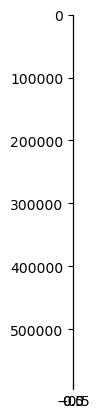

In [64]:
#use the opencv threshold function
img_gray = cv2.imread('phone.jpg')
# img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2GRAY)
img_gray = img_gray.ravel()
ret, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_OTSU)

#display the thresholded image
plt.imshow(img_thresh, cmap='gray')

* Kakšen histogram je idealen za Otsu-jevo metodo, ali, povedano drugače, na kakšnih slikah ta metoda deluje dobro?

    - Slike z jasnimi kontrasti med objekti in ozadjem, kot so fotografije s konkretnimi predmeti na enobarvnem ozadju.

    - Medicinske slike, kot so rentgenske slike, kjer so objekti, kot so kosti, dobro ločeni od okoliškega tkiva.

    - Slike, ki prikazujejo znane geometrijske oblike, kot so kvadri, krogi, trikotniki, saj so oblike pogosto dobro določene z jasnimi kontrasti.

    - Slike z dobro osvetlitvijo in nizkim šumom, saj šum lahko vpliva na natančnost določitve praga.

## Naloga 4: Barvni prostori

Kot ste slišali že na predavanjih, lahko barvo zapišemo v različnih barvnih prostorih. Vsak barvni prostor ima svoje značilnosti. V okviru naloge si boste pogledali, kako lahko s pretvorbo med RGB in HSV barvnima prostoroma na preprost način dosežemo zanimive rezultate. Najprej pa dve računski nalogi, v okviru katerih boste osvežili poznavanje algoritmov pretvorbe, ki ste jih spoznali na predavanjih (so napisani v prosojnicah):

* Barvo, zapisano v RGB barvnem prostoru z $(255, 34, 126)$ bi radi preslikali v barvni prostor HSV. Ročno izvedite postopek preslikave in izračunajte rezultat pretvorbe. Rešitev in postopek poslikajte ter vstavite v Jupyter Notebook.

In [22]:
rgb = (255, 34, 126)
#convert to hsv
hsv = cv2.cvtColor(np.uint8([[rgb]]), cv2.COLOR_RGB2HSV)[0][0]

(h,s,v) = hsv

h = h / 360.0
s = s / 255.0
v = v / 255.0

hsv = (h,s,v)

print("HSV: ", hsv)



HSV:  (0.4666666666666667, 0.8666666666666667, 1.0)


* Barvo, zapisano v HSV barvnem prostoru z $(0.65, 0.7, 0.15)$ bi radi preslikali v barvni prostor RGB. Ročno izvedite postopek preslikave in izračunajte rezultat pretvorbe. Rešitev in postopek poslikajte ter vstavite v Jupyter Notebook.

In [23]:
hsv = (0.65,0.7,0.15)

hsv = (hsv[0] * 360, hsv[1] * 255, hsv[2] * 255)

rgb = cv2.cvtColor(np.uint8([[hsv]]), cv2.COLOR_HSV2RGB)[0][0]

print("RGB: ", rgb)

RGB:  [17 38 11]


* Oglejmo si pretvetvo med barvnimi prostori na konkretnem primeru z uporabo OpenCV funkcije <i>cvtColor()</i>. Preberimo sliko <i>trucks.jpg</i> ter jo prikažite na zaslonu kot RGB sliko ter vsako komponento posebej kot sivinsko sliko. Nato bomo pretvorili prebrano sliko v HSV barvni prostor z uporabo funkcije <i>cvtColor()</i> ter prikazali na zaslonu vsako komponento posebej kot sivinsko sliko. Potrebno je paziti na pravilno obravnavo tipov matrik, saj je RGB slika privzeto shranjena v matriki tipa <i>uint8</i> (cela števila od $0$ do $255$), slika v barvnem prostoru HSV pa v matriki tipa <i>double</i> (realna števila od $0$ do $1$).


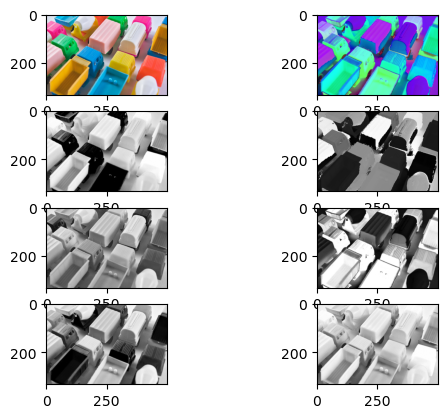

In [24]:
import cv2
import matplotlib.pyplot as plt

I_trucks_bgr = cv2.imread('trucks.jpg')
I_trucks_rgb = cv2.cvtColor(I_trucks_bgr, cv2.COLOR_BGR2RGB)
I_trucks_hsv = cv2.cvtColor(I_trucks_bgr, cv2.COLOR_BGR2HSV)

plt.figure()
plt.subplot(421)
plt.imshow(I_trucks_rgb)  # RGB slika
plt.subplot(422)
plt.imshow(I_trucks_hsv, cmap=plt.cm.hsv)  # HSV slika
plt.subplot(423)
plt.imshow(I_trucks_rgb[:,:,0], cmap='gray')  # Red komponenta
plt.subplot(424)
plt.imshow(I_trucks_hsv[:,:,0], cmap='gray')  # Hue komponenta
plt.subplot(425)
plt.imshow(I_trucks_rgb[:,:,1], cmap='gray')  # Green komponenta
plt.subplot(426)
plt.imshow(I_trucks_hsv[:,:,1], cmap='gray')  # Saturation komponenta
plt.subplot(427)
plt.imshow(I_trucks_rgb[:,:,2], cmap='gray')  # Blue komponenta
plt.subplot(428)
plt.imshow(I_trucks_hsv[:,:,2], cmap='gray')  # Value (Intensity) komponenta

plt.show()

* Različni barvni prostori so koristni tudi, ko pride do upragovanja. V RGB barvnem prostoru je recimo težko na preprost način določiti področja, ki pripadajo določenemu barvnemu odtenku. Napišite skripto, ki sliko <i>trucks.jpg</i> upraguje po modrem kanalu za vrednost praga $150$. Prikažite originalno sliko ter binarno sliko eno ob drugi.

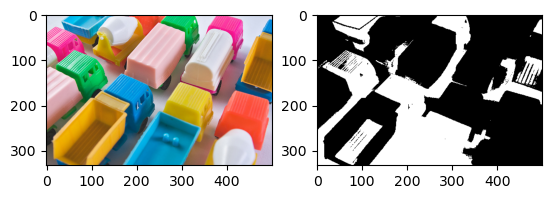

In [25]:
img = cv2.imread('trucks.jpg')

mask = np.zeros(img.shape[:2], np.uint8)

#mask out the image where the value on the blue channel is less than 150
mask[img[:,:,2] < 150] = 255

#filter the image using the mask
img[mask == 0] = 0

# display the images side by side
plt.subplot(121)
plt.imshow(I_trucks_rgb)
plt.subplot(122)
plt.imshow(mask, cmap='gray')
plt.show()

* Za osnovne komponene (rdeča, zelena, modra) se upragovanje poenostavi, če sliko preslikamo v normalizirani RGB prostor, kjer je vrednost vsake barve deljena z vsoto vrednosti vseh treh komponent (takemu prostoru rečemo tudi <i>normalizirani RGB</i>). Napišite kodo, ki modro komponento slike po celicah deli z vsoto soležnih treh barvnih komponent (uporabite funkcijo <i>np.sum</i>). Na tako sliko aplicirajte upragovanje (ker so normalizirane vrednosti definirane na razponu vrednosti od $0$ do $1$ je treba prag prilagoditi. Eksperimentirajte z vrednostmi okoli $0.5$ ter upragovano sliko prikažite.


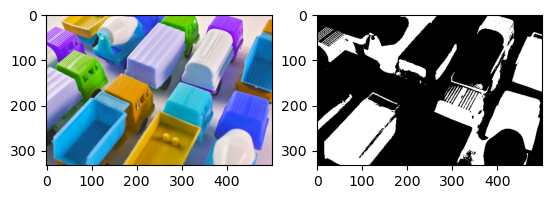

In [26]:
img = cv2.imread('trucks.jpg')
#change to normalized RGb color space

img_norm = img.copy()

#devide each channel by the sum of all channels
img_norm = img_norm / np.sum(img_norm, axis=2, keepdims=True)

#make a mask with the threshold 0.5 on the blue channel
mask = img_norm[:,:,2] > 0.45

# print(img_norm)

#show the original image and the mask
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask, cmap='gray')


plt.show()



* Na tak način lahko določimo regije rdeče, zelene in modre barve. Če pa bi želeli izluščiti poljuben odtenek, se je najbolj intuitivno poslužiti preslikave v HSV barvni prostor. Dodajte kodo, ki sliko iz RGB barvnega prostora preslika v HSV prostor ter upragujte po komponenti odtenka (Hue). Ker zavzema modra barva samo del vrednostnega območja, je potrebno sliko upragovati z dvema pragoma. To se najhitreje reši kot logična funkcija dveh mask (vsako dobimo z uporabo enega praga). Primer: $AB = A \& B$. V pomoč pri določitvi pragov za modro barvo lahko uporabite naslednjo kodo, ki vam prikaže barvni spekter cele komponente odtenka:

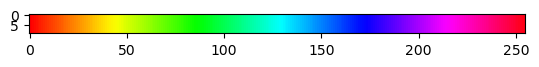

In [27]:
import numpy as np
plt.figure()
plt.imshow(np.meshgrid(np.linspace(0, 1, 255), np.ones((10, 1)))[0], cmap=plt.cm.hsv)
plt.show()

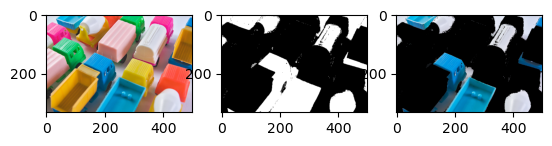

In [28]:
img = cv2.imread('trucks.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


#isolate the blue color
h_low = 130/ 360.0 * 255
h_high = 180/ 360.0 * 255

mask = cv2.inRange(img_hsv, (h_low, 0, 0), (h_high, 255, 255))

img_hsv[mask == 0] = 0


# display the images side by side
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(mask , cmap='gray')
plt.subplot(133)
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
plt.show()

* Eksperimentirajte z robnimi vrednostmi območja ter optimalno upragovano sliko prikažite. Postopek ponovite za poljubno izbrano sliko (sliko si izberite sami, prav tako si izberite barvo, ki bi jo radi izluščili iz slike).

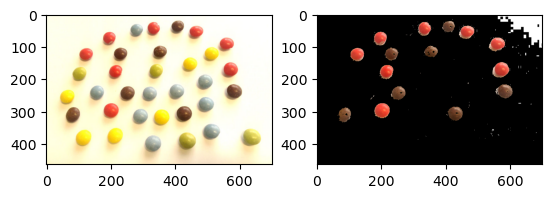

In [29]:
img = cv2.imread('candy.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#isolate the red color using the HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


low_h = 0 / 360.0 * 255
high_h = 20 / 360.0 * 255

mask = cv2.inRange(img_hsv, (low_h, 0, 0), (high_h, 255, 255))

#mask the image using the mask
img_hsv[mask == 0] = 0

# display the images side by side
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
plt.show()

* Implementirajte funkcijo <i>im_mask</i>, ki ji lahko podate sliko v RGB barvnem prostoru ter binarno sliko iste velikosti, funkcija pa vam vrne barvno sliko, kjer je barva slikovnih elementov postavljena na črno, če je vrednost soležnega elementa v maski $0$. Funkcijo implementirajte brez eksplicitnih zank.

In [30]:
# I = RGB image
# mask = binary mask
def im_mask(I, mask):
    I = I.copy()
    I[mask==0] = 0
    return I
    

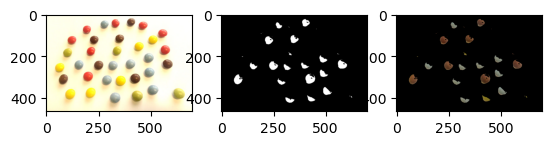

In [31]:
img = cv2.imread('candy.jpg')

mask = np.zeros(img.shape[:2], np.uint8)

#mask out the image where the value on the blue channel is less than 150
mask[img[:,:,2] < 150] = 255

img_masked = im_mask(img, mask)

# display the images side by side
plt.subplot(131)    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.subplot(133)
plt.imshow(cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB))
plt.show()

## Naloga 5: Regije in morfološke operacije

V tej nalogi si boste ogledali kako iz binarne slike izluščiti posamezne regije, kako te regije zapisati na različne načine, ter, kako si lahko z uporabo morfoloških operacijpomagamo pri detekciji regij v šumnih slikah.

Za razčlenitev regij na sliki se zaradi njegove časovne predvidljivosti najpogostejeuporablja algoritem zaporednega označevanja regij, oziroma povezanih komponent, kiste ga obravnavali na predavanjih. Za začetek ponovimo delovanje algoritma z ročnimreševanjem preprostega primera:

* Podana je črno-bela slika za katero določite rezultat algoritma barvanja regij po prvem in drugem sprehodu po sliki ter povezave med oznakami za okolico $\mathcal{N}_4$. Na sliki so z $1$ označena področja objektov v sliki, celice z vrednostjo $0$ pa so ozadje. Rešitev in postopek poslikajte in vstavite v Jupyter Notebook.

$$A = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 1 \\ 0 & 1 & 0 & 1 & 0 & 0 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 \\ 0 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 1 \\ 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}$$  

* Preberite sliko <i>regions.png</i>. Kljub temu, da slika vsebuje zgolj dve vrednosti, ni shranjena v tipu binarnih logičnih vrednosti, zato jo najprej spremenitev binarno z uporabo funkcije <i>threshold</i> in uporabo ustreznega praga (recimo $127$). Uporabite funkcijo <i>connectedComponents()</i>, ki implementira algoritem označevanja povezanih regij. Izpišite število regij (vključno z ozadjem) in prikažite maske, ki označujejo posamezne regije.

Number of connected components:  4


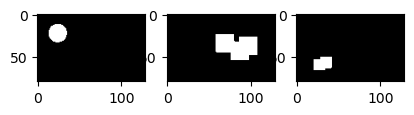

In [89]:
img = cv2.imread('regions.png')
#change to binary image using threshold 127
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

#use the function connectedComponents to find the connected components
num_labels, labels = cv2.connectedComponents(img_thresh)

#display the number of connected components
print("Number of connected components: ", num_labels)

#display the masks of the connected components
plt.figure()
for i in range(1, num_labels):
    plt.subplot(1, num_labels, i)
    plt.imshow(labels == i, cmap='gray')
plt.show()


* Za posamezne regije iz prejšnje naloge določite centroid ter okvir okoli regije (BoundingBox). Navedene lastnosti prikažite nad sliko maske.

Namig: za izris centroidov uporabite PyPlot funkcijo <a href="https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html"><i>scatter</i></a>, za izris pravokotnikov pa PyPlot funkcijo <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html"><i>Rectangle()</i></a>.

In [90]:
#get cetroids of the connected components and the bounding boxes
centroids = []
bboxes = []

for i in range(1, num_labels):
    mask = labels == i
    M = cv2.moments(mask)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    x,y,w,h = cv2.boundingRect(mask)
    
    centroids.append((cx, cy))
    bboxes.append((x,y,w,h))
    
    print("Centroid: ", cx, cy)
    print("Bounding box: ", x, y, w, h)
    

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'moments'
> Overload resolution failed:
>  - array data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'array'


Na žalost binarne slike, pridobljene iz realnih podatkov, pogosto niso tako lepe kot slike, s katerimi smo delali do sedaj. V realnih slikah je veliko šuma, ki se v binarni sliki odraža kot drobne regije ali luknjice v regijah, ki motijo nadaljnje procesiranje. V takih primerih so zelo priročne morfološke operacije, s pomočjo katerih lahko tak šum odpravimo. V okviru te naloge bomo spoznali morfološki operaciji skrči (<i>erode</i>) in razširi (<i>dilate</i>) v kontekstu odstranjevanja šuma iz binarne slike.

Najprej na kratko ponovite delovanje obeh operacij z naslednjo nalogo: 

* Podana je črno-bela slika $A$ za katero določite rezultat algoritma filtriranja s filtroma razširi ter skrči za jedro $K$. Rešitev poslikajte in vstavite v Jupyter Notebook.

$$K = \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 0 & 1 & 0 \end{bmatrix}$$

$$A = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 & 0 & 0 & 1 & 1 & 0 \\ 1 & 1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 \\ 0 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 0 \end{bmatrix}$$  

In [34]:
# Zapišite rešitev tukaj

* Naložite sliko <i>regions_noise.png</i>, jo spremenite v črno-belo in nato binarizirajte z uporabo ustreznega praga. Uporabite funkcijo <i>connectedComponents()</i> za določitev regij in regije preštejte. Kaj opazite? Kako velike so posamezne regije?

In [35]:
# Zapišite rešitev tukaj

* Na sliki preizkusite OpenCV funkciji <i>dilate()</i> in <i>erode()</i> ter vizualizirajte njiune rezultate.

In [36]:
# Inicializacija preprostega jedra
kernel = np.ones((3, 3), np.uint8)

# Zapišite rešitev tukaj

* S pomočjo kombinacije funkcij <i>erode()</i> in <i>dilate()</i> implementirajte še operaciji odpiranja (<i>opening</i>) in zapiranja (<i>closing</i>) ter rezultat primerjajte z vgrajenima funkcijama implementiranima v sklopu OpenCV funkcije <i>morphologyEx()</i>. Prikažite rezultat obeh operacij na upragovani sliki <i>regions_noise.png</i>. Glede na rezultate premislite, kako bi odpravi celoten šum, ki je prisoten v izvorni binarni sliki? Rešitev implementirajte in preizkusite.

In [37]:
# Zapišite rešitev tukaj

<b>$\star$ (10 točk)</b> Pridobljeno znanje o uporabi morfoloških operacij preizkusite še na bolj realnem primeru. Preberite sliko <i>bird.jpg</i>, spremenite jo v sivinsko ter določite prag, da dobite čim boljšo masko objekta. Ker popolne maske ne morete dobiti samo z globalnim pragom, jo izboljšajte z uporabo morfoloških operacij. Število točk, ki jih boste dobili za nalogo je odvisno od kakovosti rezultata.

In [38]:
# Zapišite rešitev tukaj

## Naloga 6: Delo z živimi slikami


V okviru te naloge si bomo ogledali delo z "živimi" slikami. Za reševanje naloge boste potrebovali spletno kamero. V primeru, da le-te nimate na razpolago, lahko nalogo rešite tudi z uporabo poljubnega video izseka - princip reševanja naloge bo enak.

* Oglejmo si kodo za pridobitev slike iz spletne kamero ter prikaz le-te. Za prekinitev izvajanje funkcijo bom definirali tipko <i>q</i>.

In [67]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

# While zanka za posodabljanje pridobljene slike do prekinitve
while(True):
    # Poskusajmo pridobiti trenutno sliko iz spletne kamere
    ret, frame = cap.read()
    
    # Ce to ni mogoce (kamera izkljucena, itd.), koncajmo z izvajanjem funkcije
    if ret == False:
        break

    # Prikazi trenutno sliko
    cv2.imshow('frame', frame)
    
    # Ob pritisku tipke 'q' prekini izvajanje funkcije
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Izklopi kamero in zapri okno
cap.release()
cv2.destroyAllWindows()

[ WARN:0@971.132] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


* Izrišite trenutno sliko spletne kamere poleg katere vizualizirate tudi pripadajočo sivinsko sliko. Izrisani sliki zrcalite z uporabo OpenCV funkcije <i>flip()</i>.

In [75]:
# display the image from the camera and it's grayscale version, mirror them using flip()
import numpy as np
import cv2

cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

while(True):
    # Poskusajmo pridobiti trenutno sliko iz spletne kamere
    ret, frame = cap.read()
    
    # Ce to ni mogoce (kamera izkljucena, itd.), koncajmo z izvajanjem funkcije
    if ret == False:
        break

    # Prikazi trenutno sliko
    cv2.imshow('frame', cv2.flip(frame, 1))
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('gray', cv2.flip(gray, 1))
    
    
    # Ob pritisku tipke 'q' prekini izvajanje funkcije
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Izklopi kamero in zapri okno
cap.release()
cv2.destroyAllWindows()


[ WARN:0@1086.595] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


* (+<b>5 točk</b>) Izberite si predmet poljubne barve in z uporabo znanja iz prejšnjih nalog upragujte sliko s takšnimi vrednostmi, da boste iz nje izluščili izbrani predmet. Z uporabo OpenCV funkcije <i><a href="https://docs.opencv.org/4.2.0/d4/d73/tutorial_py_contours_begin.html" target="_blank">findContours()</a></i> izrišite konturo okoli izluščenih predmetov. Število točk, ki jih boste dobili za to nalogo bo odvisno od robustnosti delovanja vaše metode. 

In [88]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)  # 0 = privzeta spletna kamera

while(True):
    # Poskusajmo pridobiti trenutno sliko iz spletne kamere
    ret, frame = cap.read()
    
    # Ce to ni mogoce (kamera izkljucena, itd.), koncajmo z izvajanjem funkcije
    if ret == False:
        break

    # Prikazi trenutno sliko

    #get contours around the orange object
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    #apply gaussian blur to the image
    hsv = cv2.GaussianBlur(hsv, (5, 5), 0)
    mask = cv2.inRange(hsv, (0, 100, 100), (20, 255, 255))
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    
    
    #check if the object is a torus
    for c in contours:
        #calculate the area of the contour
        area = cv2.contourArea(c)
        
        #calculate the perimeter of the contour
        perimeter = cv2.arcLength(c, True)
        
        if perimeter == 0:
            continue
        
        #calculate the circularity of the contour
        circularity = 4 * np.pi * area / perimeter**2
        
        #if the circularity is bigger than 0.7 draw the contour
        if circularity > 0.2 and area > 500:
            cv2.drawContours(frame, [c], -1, (0, 255, 0), 3)            
    

    cv2.imshow('frame', cv2.flip(frame, 1))
    
    # Ob pritisku tipke 'q' prekini izvajanje funkcije
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Izklopi kamero in zapri okno
cap.release()
cv2.destroyAllWindows()


[ WARN:0@1755.767] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1
